### Домашняя работа

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

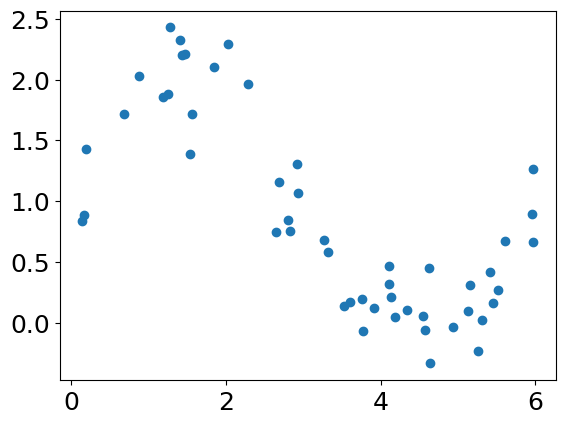

In [3]:
import numpy as np
import pandas as pd
import matplotlib
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
matplotlib.rc("font", size=18) # для увеличения шрифта подписей графиков

data= pd.read_csv("3.10_non_linear.csv")
X = data[["x_train"]]
y = data["y_train"]
plt.scatter(X,y)
plt.show()

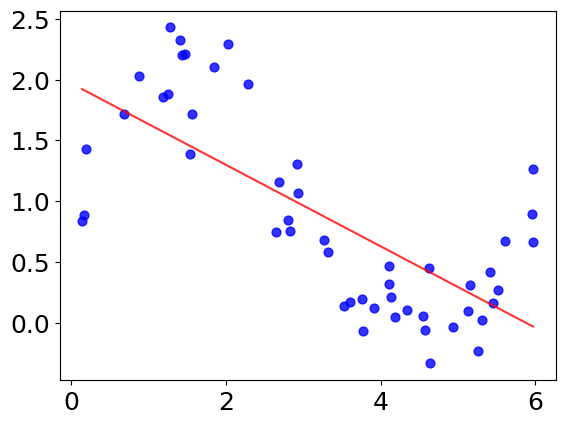

In [4]:
reg = LinearRegression().fit(X, y)
y_hat = reg.predict(X)
plt.scatter(X, y, 40, 'b', 'o', alpha=0.8)

plt.plot(X, y_hat, 'r', alpha=0.8, label='fitted')

plt.show()

In [5]:
from sklearn.metrics import r2_score

def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

def get_error(degree, data):
    X = generate_degrees(data['x_train'], degree)

    model = LinearRegression().fit(X, data['y_train'])
    y_pred = model.predict(X)

    error = r2_score(data['y_train'], y_pred)
    return error

def get_polynomial(degree, data, error):
    X = generate_degrees(data['x_train'], degree)

    model = LinearRegression().fit(X, data['y_train'])
    y_pred = model.predict(X)

    plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
    plt.plot(data['x_train'], y_pred)

0.5194693682784115
0.5334743428787219
0.8884043369162163
0.8954938957170193
0.895556844143969
0.8993403708180607
0.90046097540244
0.9086556247250233
0.9088071215143878
0.9091133831299086
Лучшая степень 10, минимальная ошибка 0.909


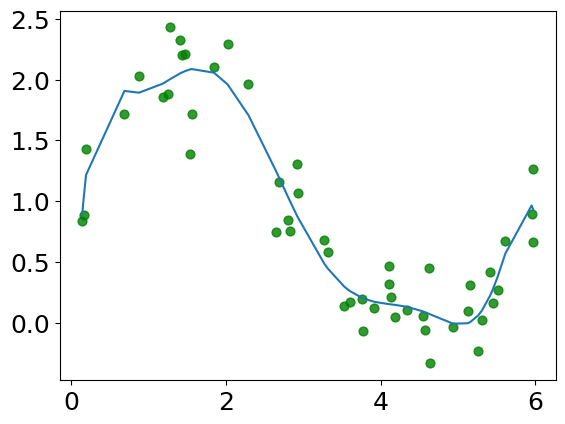

In [8]:
min_error = -1
c_degree = 0

for i in range(1,11):
    er = get_error(i,data)
    print(er)
    if er > min_error:
        min_error = er
        c_degree = i

print("Лучшая степень %d, минимальная ошибка %.3f" % (c_degree, min_error))

get_polynomial(c_degree, data, min_error)


**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов.

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [39]:
import numpy as np
import pandas as pd
import matplotlib
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
matplotlib.rc("font", size=18) # для увеличения шрифта подписей графиков

class CustomLinearReg:
    def __init__(self, filename):
        self.__filename = filename
        pass

    def __fit(self,X, y):
        self.reg = LinearRegression().fit(X, y)
        self.b = self.reg.coef_
        self.a = self.reg.intercept_

    def fit(self, x_field_name: str, y_field_name: str):
        data = pd.read_csv(self.__filename)
        self.__fit(data[[x_field_name]], data[y_field_name])
    
    def __reg_prediction(self,X):
        return self.a + self.b * X

    def predict(self,X):
        return self.__reg_prediction(X)


In [37]:
### Использование ###

rg = CustomLinearReg("1.8_phones.csv")
rg.fit("year", "price")
res = rg.predict([2019,2018,2017])
res

array([12750.0225506 , 11779.62661951, 10809.23068842])

**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

data= pd.read_csv("1.4_houses.csv")
X = data[["dim_1"]]
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression().fit(X_train, y_train)
reg.predict(X_test[0:1])[0], y_test[0:1]


C:\Users\oliso\AppData\Local\Temp\ipykernel_28680\3625825039.py:16: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  reg.predict(X_test[0:1])[0], y_test[0:1]


(299.0089728804587,
 24    254.0
 Name: price, dtype: float64)

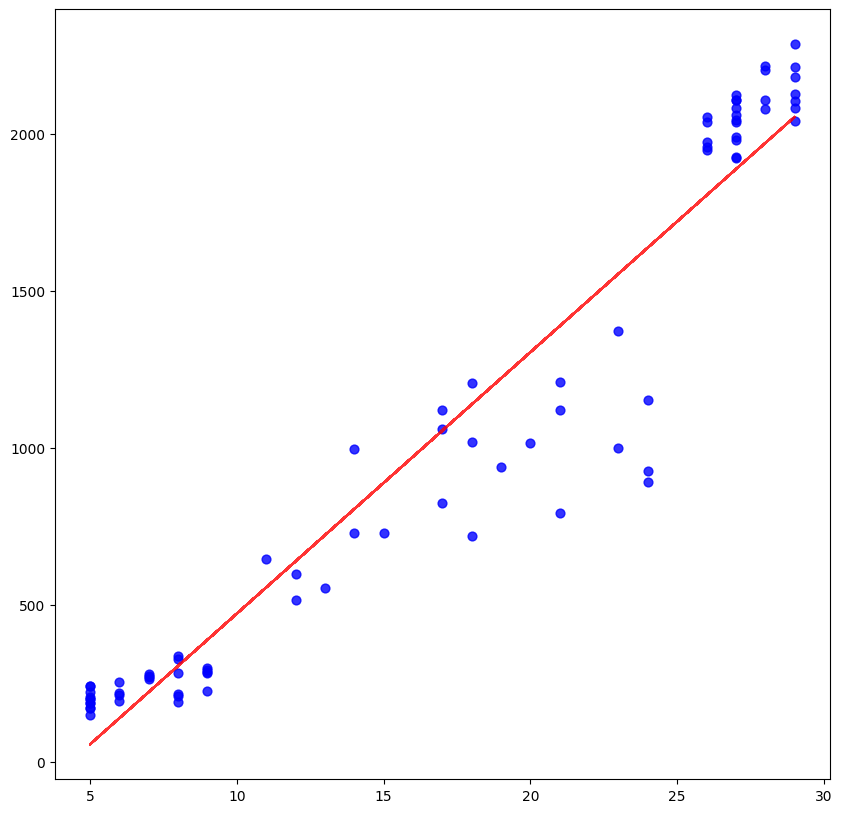

In [54]:
## TRAIN

fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()

y_hat_t = reg.predict(X_train)
ax.scatter(X_train, y_train, 40, 'b', 'o', alpha=0.8)

ax.plot(X_train, y_hat_t, 'r', alpha=0.8, label='fitted')

plt.show()

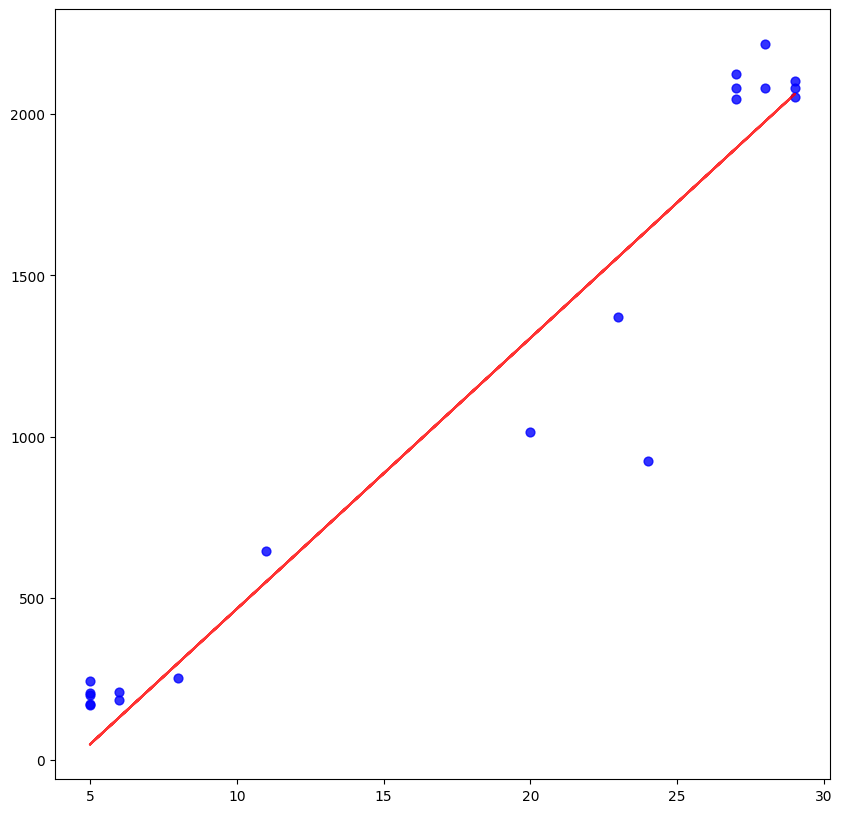

In [64]:
## TEST

fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()

y_hat_t = reg.predict(X_test)
ax.scatter(X_test, y_test, 40, 'b', 'o', alpha=0.8)

ax.plot(X_test, y_hat_t, 'r', alpha=0.8, label='fitted')

plt.show()

In [65]:
y_pred = reg.predict(X_test)
print("r2_score = %s" % r2_score(y_test, y_pred))

r2_score = 0.9354603757402145


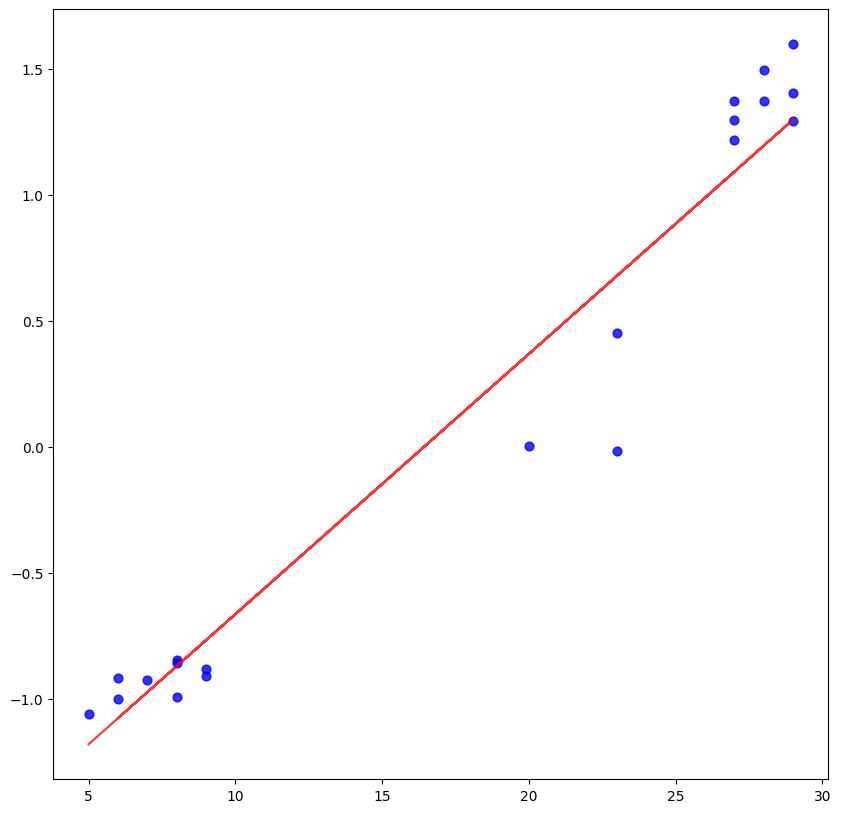

In [77]:
# Применяем z-score

from sklearn.preprocessing import StandardScaler

data= pd.read_csv("1.4_houses.csv")
X = data[["dim_1"]]
y = data["price"]

y_transformed = StandardScaler().fit_transform(y.values.reshape(-1, 1)).reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()

y_hat_t = reg.predict(X_test)
ax.scatter(X_test, y_test, 40, 'b', 'o', alpha=0.8)

ax.plot(X_test, y_hat_t, 'r', alpha=0.8, label='fitted')

plt.show()


In [74]:
y_pred = reg.predict(X_test)
print("r2_score = %s" % r2_score(y_test, y_pred))

r2_score = 0.9751016973955949


0.9354603757402145 --> 0.9751016973955949